# Variables aléatoires discrètes

## 1 Exemple introductif

### 1.1 Calculs exacts

a. Gains pour toutes les issues possibles :

In [2]:
gains = []
for de1 in range(1,6+1):
    for de2 in range(1,6+1):
        gains.append(de1+de2)

print(gains)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


b. Loi de probabilité :

In [3]:
import numpy as np
omegax = list(range(2,12+1))
loi = []
for k in omegax:
    pk = gains.count(k) / len(gains)
    loi.append((k,pk))
print(loi)

[(2, 0.027777777777777776), (3, 0.05555555555555555), (4, 0.08333333333333333), (5, 0.1111111111111111), (6, 0.1388888888888889), (7, 0.16666666666666666), (8, 0.1388888888888889), (9, 0.1111111111111111), (10, 0.08333333333333333), (11, 0.05555555555555555), (12, 0.027777777777777776)]


c. Calcul de l'espérance :

In [4]:
esperance = 0
for  (k,pk) in loi:
    esperance += k * pk
print(esperance)

6.999999999999999


d. Calcul de la variance :

In [5]:
variance = 0
for (k,pk) in loi:
    variance = variance + (k ** 2) * pk
variance = variance - esperance ** 2
print(variance)

5.833333333333336


### 1.2 Simulation

#### Loi de probabilité

In [2]:
import random

def simulation_experience():
    return random.choices([1, 2, 3, 4, 5, 6], k=10)

In [3]:
def fun_X(des):
    return sum(des)

In [4]:
def simulation_repetee(exp, X, nrep):
    return [X(exp()) for _ in range(nrep)]

In [5]:
import random
import numpy

def estimation_loi(valeurs_obtenues, valeurs_possibles):
    # Ensemble des valeurs différentes possibles
    # prises par la variable aléatoire
    omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

In [6]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 1000)
loi = estimation_loi(valeurs_simulees, list(range(10,60+1)))
print(loi)

[(10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.001), (19, 0.001), (20, 0.002), (21, 0.005), (22, 0.005), (23, 0.007), (24, 0.012), (25, 0.015), (26, 0.024), (27, 0.027), (28, 0.037), (29, 0.04), (30, 0.046), (31, 0.054), (32, 0.067), (33, 0.066), (34, 0.061), (35, 0.087), (36, 0.075), (37, 0.062), (38, 0.061), (39, 0.063), (40, 0.04), (41, 0.039), (42, 0.033), (43, 0.021), (44, 0.021), (45, 0.014), (46, 0.007), (47, 0.001), (48, 0.002), (49, 0.003), (50, 0.001), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0)]


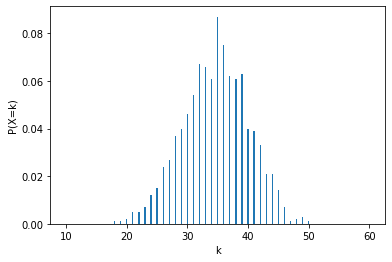

In [7]:
import matplotlib
import matplotlib.pyplot as plt

x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

#### Cas où oméga de x est difficile à déterminer

In [8]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
    # On détermine Omega_X
    if valeurs_possibles is None :
        omegax = numpy.unique(valeurs_obtenues)
    else :
        omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

In [9]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 10000)
loi = estimation_loi(valeurs_simulees)
print(loi)

[(17, 0.0001), (18, 0.0005), (19, 0.001), (20, 0.0013), (21, 0.0014), (22, 0.0044), (23, 0.0087), (24, 0.0099), (25, 0.0138), (26, 0.0196), (27, 0.025), (28, 0.0316), (29, 0.0396), (30, 0.0429), (31, 0.0536), (32, 0.0632), (33, 0.0656), (34, 0.0729), (35, 0.072), (36, 0.0727), (37, 0.073), (38, 0.0616), (39, 0.0573), (40, 0.053), (41, 0.0375), (42, 0.0342), (43, 0.0252), (44, 0.0203), (45, 0.014), (46, 0.0088), (47, 0.0063), (48, 0.0038), (49, 0.0021), (50, 0.0017), (51, 0.0002), (52, 0.0005), (53, 0.0003), (54, 0.0002), (55, 0.0002)]


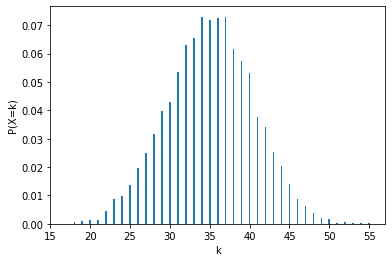

In [10]:
x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

## 2 Exercices

### 2.1 5000 simplifié

In [11]:
import random

def simulation_experience5000():
    return random.choices([1, 2, 3, 4, 5, 6], k=5)

def fun_X5000(des):
    res = 0
    for i in range(len(des)):
        if des[i] == 1:
            res += 100
        elif des[i] == 5:
            res += 50
    return res

In [12]:
def cinqmille(nbsim: int) -> dict:
    res = {}
    valeurs_simulees = simulation_repetee(simulation_experience5000, fun_X5000, nbsim)
    res["loi"] = estimation_loi(valeurs_simulees, list(range(0, 451, 50)))
    
    esperance = 0
    variance = 0
    for (k,pk) in res["loi"]:
        esperance += k * pk
        variance = variance + (k ** 2) * pk
    
    res['E'] = round(esperance, 2)
    res['V'] = round(variance - esperance ** 2, 2)
    return res

In [13]:
print(cinqmille(1000))

{'loi': [(0, 0.127), (50, 0.164), (100, 0.238), (150, 0.184), (200, 0.159), (250, 0.067), (300, 0.046), (350, 0.01), (400, 0.003), (450, 0.001)], 'E': 127.1, 'V': 7370.59}


#### Bonus

In [16]:
import random

def fun_X5000bonus(des):
    res = 0
    if (des == [1, 2, 3, 4, 5]) or (des == [2, 3, 4, 5, 6]) :
        res += 1500
    
    dictio = {}
    for i in range(len(des)):
        if des[i] not in dictio:
            dictio[des[i]] = 1
        else:
            dictio[des[i]] += 1
    
    for cle, valeur in dictio.items():
        if valeur == 3:
            if cle == 1:
                res += 1000
            else:
                res += 100*cle
    
    return res

In [19]:
def cinqmillebonus(nbsim: int) -> dict:
    res = {}
    valeurs_simulees = simulation_repetee(simulation_experience5000, fun_X5000bonus, nbsim)
    res["loi"] = estimation_loi(valeurs_simulees, list(range(0, 2000, 100)))
    
    esperance = 0
    variance = 0
    for (k,pk) in res["loi"]:
        esperance += k * pk
        variance = variance + (k ** 2) * pk
    
    res['E'] = round(esperance, 2)
    res['V'] = round(variance - esperance ** 2, 2)
    return res

In [20]:
print(cinqmillebonus(1000))

{'loi': [(0, 0.808), (100, 0.0), (200, 0.029), (300, 0.036), (400, 0.035), (500, 0.034), (600, 0.021), (700, 0.0), (800, 0.0), (900, 0.0), (1000, 0.037), (1100, 0.0), (1200, 0.0), (1300, 0.0), (1400, 0.0), (1500, 0.0), (1600, 0.0), (1700, 0.0), (1800, 0.0), (1900, 0.0)], 'E': 97.2, 'V': 53612.16}


### 2.2 Sanction pifométrique